## Trial 19.03.2023

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [60]:
df = pd.read_excel('database_v03.xlsx', index_col=False)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5670 entries, 0 to 5669
Data columns (total 37 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Hm0 d     5670 non-null   float64
 1   Tp d      5670 non-null   float64
 2   Tm d      5670 non-null   float64
 3   Tm1,0 d   5670 non-null   float64
 4   hdeep     5670 non-null   float64
 5   mmm       5670 non-null   float64
 6   β         5670 non-null   float64
 7   Spread s  5670 non-null   float64
 8   h         5670 non-null   float64
 9   Hm0 toe   5670 non-null   float64
 10  Tp toe    5670 non-null   float64
 11  Tm toe    5670 non-null   float64
 12  Tm1,0t    5670 non-null   float64
 13  ht        5670 non-null   float64
 14  Bt        5670 non-null   float64
 15  cotαd     5670 non-null   float64
 16  cotαu     5670 non-null   float64
 17  cotαexcl  5670 non-null   float64
 18  cotαincl  5670 non-null   float64
 19  gf_d      5670 non-null   float64
 20  D50_d     5670 non-null   floa

In [62]:
df.columns

Index(['Hm0 d', 'Tp d', 'Tm d', 'Tm1,0 d', 'hdeep', 'mmm', 'β', 'Spread s',
       'h', 'Hm0 toe', 'Tp toe', 'Tm toe', 'Tm1,0t', 'ht', 'Bt', 'cotαd',
       'cotαu', 'cotαexcl', 'cotαincl', 'gf_d', 'D50_d', 'gf_u', 'D50_u', 'gf',
       'D', 'Rc', 'B', 'hb', 'tanαB', 'Bh', 'Ac', 'Gc', 'RF', 'CF', 'WF', 'q',
       'log_q'],
      dtype='object')

In [63]:
X = df[df.columns[:-2]]
y = df[['log_q']]

In [64]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5670 entries, 0 to 5669
Data columns (total 35 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Hm0 d     5670 non-null   float64
 1   Tp d      5670 non-null   float64
 2   Tm d      5670 non-null   float64
 3   Tm1,0 d   5670 non-null   float64
 4   hdeep     5670 non-null   float64
 5   mmm       5670 non-null   float64
 6   β         5670 non-null   float64
 7   Spread s  5670 non-null   float64
 8   h         5670 non-null   float64
 9   Hm0 toe   5670 non-null   float64
 10  Tp toe    5670 non-null   float64
 11  Tm toe    5670 non-null   float64
 12  Tm1,0t    5670 non-null   float64
 13  ht        5670 non-null   float64
 14  Bt        5670 non-null   float64
 15  cotαd     5670 non-null   float64
 16  cotαu     5670 non-null   float64
 17  cotαexcl  5670 non-null   float64
 18  cotαincl  5670 non-null   float64
 19  gf_d      5670 non-null   float64
 20  D50_d     5670 non-null   floa

In [65]:
y

,log_q
0,-3.560667
1,-5.040959
2,-2.829738
3,-4.987163
4,-5.273273
...,...
5665,-3.518557
5666,-3.073143
5667,-3.913640
5668,-3.212020


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import pandas as pd
import numpy as np
import sklearn

In [68]:
data_dmatrix = xgb.DMatrix(data=X_train, label=y_train)

In [69]:
xg_reg = xgb.XGBRegressor(
    objective ='reg:squarederror', 
    learning_rate = 0.05,
    max_depth = 12, 
    min_child_weight=5,
    reg_lambda=3,
    subsample=0.25
)

In [70]:
xg_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=12, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [71]:
preds = xg_reg.predict(X_test)

In [72]:
preds

array([-3.743564 , -4.002567 , -3.0716329, ..., -4.3936877, -5.042208 ,
       -4.346612 ], dtype=float32)

In [73]:
y_test

,log_q
3529,-4.041914
3967,-4.307153
1859,-2.856985
2589,-3.247184
1662,-4.860121
...,...
4527,-4.372634
2339,-4.459872
495,-4.200659
1405,-5.398297


In [74]:
rmse = np.sqrt(mean_squared_error(y_test, preds))

In [75]:
rmse

0.3576352229150839

In [76]:
y_test.describe()

,log_q
count,1701.000000
mean,-4.186291
std,0.972451
min,-6.000000
25%,-4.892790
50%,-4.251812
75%,-3.502208
max,-0.790485


In [77]:
preds_df = pd.DataFrame(preds)

In [78]:
preds_df.describe()

,0
count,1701.000000
mean,-4.139819
std,0.837625
min,-5.727424
25%,-4.789207
50%,-4.303282
75%,-3.613974
max,-0.943582


In [79]:
mape = mean_absolute_percentage_error(y_test, preds)

In [80]:
mape

0.062117785066958545

In [81]:
X_train['log_q'] = y_train

In [82]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3969 entries, 205 to 860
Data columns (total 36 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Hm0 d     3969 non-null   float64
 1   Tp d      3969 non-null   float64
 2   Tm d      3969 non-null   float64
 3   Tm1,0 d   3969 non-null   float64
 4   hdeep     3969 non-null   float64
 5   mmm       3969 non-null   float64
 6   β         3969 non-null   float64
 7   Spread s  3969 non-null   float64
 8   h         3969 non-null   float64
 9   Hm0 toe   3969 non-null   float64
 10  Tp toe    3969 non-null   float64
 11  Tm toe    3969 non-null   float64
 12  Tm1,0t    3969 non-null   float64
 13  ht        3969 non-null   float64
 14  Bt        3969 non-null   float64
 15  cotαd     3969 non-null   float64
 16  cotαu     3969 non-null   float64
 17  cotαexcl  3969 non-null   float64
 18  cotαincl  3969 non-null   float64
 19  gf_d      3969 non-null   float64
 20  D50_d     3969 non-null   flo

In [83]:
X_train.to_excel('train_data_19_03.xlsx', index=False)

In [84]:
X_test['log_q'] = y_test

In [85]:
X_test.to_excel('test_data_19_03.xlsx', index=False)

In [86]:
preds_df.to_excel('predictions_19_03.xlsx', index=False)

In [87]:
scaled_preds = 10**preds_df

In [88]:
scaled_preds.to_excel('scaled_predictions_19_03.xlsx', index=False)

In [89]:
scaled_y_test = 10**y_test

In [90]:
rmse = np.sqrt(mean_squared_error(scaled_y_test, scaled_preds))

In [91]:
rmse

0.0027864209691559204

In [92]:
mape = mean_absolute_percentage_error(scaled_y_test, scaled_preds)

In [93]:
mape

1.0702527655527707

In [ ]:
scaled_y_test.to_excel('scaled_y_test_19_03.xlsx', index=False)

## Import data

In [1]:
import pandas as pd

In [2]:
data = pd.read_excel('train_data2.xlsx', index_col=False)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4595 entries, 0 to 4594
Data columns (total 36 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Hm0 d     4595 non-null   float64
 1   Tp d      4595 non-null   float64
 2   Tm d      4595 non-null   float64
 3   Tm1,0 d   4595 non-null   float64
 4   hdeep     4595 non-null   float64
 5   mmm       4595 non-null   float64
 6   β         4595 non-null   int64  
 7   Spread s  4595 non-null   int64  
 8   h         4595 non-null   float64
 9   Hm0 toe   4595 non-null   float64
 10  Tp toe    4595 non-null   float64
 11  Tm toe    4595 non-null   float64
 12  Tm1,0t    4595 non-null   float64
 13  ht        4595 non-null   float64
 14  Bt        4595 non-null   float64
 15  cotαd     4595 non-null   float64
 16  cotαu     4595 non-null   float64
 17  cotαexcl  4595 non-null   float64
 18  cotαincl  4595 non-null   float64
 19  gf_d      4595 non-null   float64
 20  D50_d     4595 non-null   floa

In [4]:
data.head()

,Hm0 d,Tp d,Tm d,"Tm1,0 d",hdeep,mmm,β,Spread s,h,Hm0 toe,...,B,hb,tanαB,Bh,Ac,Gc,RF,CF,WF,q
0,0.231872,2.061655,1.718046,1.874232,0.368887,250.0000,0,0,0.267707,0.134696,...,0.00,0.00000,0.00,0.00,0.149663,0.181282,2,2,4,0.000275
1,0.117000,1.600000,1.333333,1.454545,0.720000,1000.0000,20,0,0.720000,0.117000,...,0.00,0.00000,0.00,0.00,0.240000,0.000000,1,1,9,0.000009
2,0.171266,1.766000,1.505140,1.654000,0.750000,111.1111,0,0,0.480000,0.173200,...,0.00,-0.06367,0.02,0.00,0.067000,0.000000,1,2,6,0.001480
3,0.081390,1.138000,0.986900,1.044000,0.827743,20.0000,0,0,0.257743,0.064230,...,0.21,0.02000,0.00,0.21,0.090000,0.090000,1,1,9,0.000010
4,0.078170,1.388000,1.029000,1.274000,0.729000,1000.0000,0,0,0.229000,0.065540,...,0.00,-0.01660,0.00,0.00,0.058300,0.000000,1,1,9,0.000005


In [5]:
features = list(data.columns)[:-1]

In [6]:
len(features)

35

In [7]:
target = list(data.columns)[-1]

In [8]:
target

'q'

In [9]:
data[features[:20]].describe()

,Hm0 d,Tp d,Tm d,"Tm1,0 d",hdeep,mmm,β,Spread s,h,Hm0 toe,Tp toe,Tm toe,"Tm1,0t",ht,Bt,cotαd,cotαu,cotαexcl,cotαincl,gf_d
count,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000
mean,0.195023,1.908970,1.588847,1.748779,2.210337,462.824976,2.830468,0.295974,0.556440,0.168656,1.923305,1.582310,1.792648,0.534907,0.037966,2.121362,3.756655,2.068522,2.410253,0.730705
std,0.429600,1.257341,1.045544,1.137918,11.822921,466.846095,9.876831,1.302811,0.581644,0.278094,1.273530,1.014881,1.159961,0.583068,0.100943,1.335997,10.042655,1.495805,1.664401,0.283809
min,0.026800,0.727200,0.592300,0.661091,0.120350,7.600000,0.000000,0.000000,0.029000,0.020713,0.731800,0.609800,0.665300,0.029000,0.000000,0.000000,-5.000000,-1.331333,-1.331333,0.380000
25%,0.100000,1.384000,1.156522,1.261660,0.545000,50.000000,0.000000,0.000000,0.300000,0.092895,1.384000,1.156522,1.261660,0.300000,0.000000,1.333333,1.250000,1.250000,1.500000,0.400000
50%,0.129000,1.652000,1.377000,1.515009,0.700000,111.111100,0.000000,0.000000,0.470000,0.122300,1.652000,1.377158,1.521000,0.440000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000
75%,0.160000,1.974538,1.630047,1.800000,0.800000,1000.000000,0.000000,0.000000,0.610000,0.150000,1.994148,1.630000,1.903500,0.610000,0.000000,3.000000,3.000000,2.889643,3.283644,1.000000
max,5.510000,15.000000,12.500000,13.636364,100.000000,1000.000000,80.000000,10.000000,5.010000,2.403070,13.700000,10.792500,10.640000,5.010000,1.000000,7.000000,100.000000,7.863248,11.299435,1.000000


In [10]:
data['β'].value_counts()

0     4092
10     102
25      85
20      55
60      51
45      45
30      36
6       27
40      19
15      13
17       9
9        7
13       7
12       6
16       5
11       5
50       4
14       4
5        4
70       3
18       3
80       3
33       2
7        2
1        2
34       1
32       1
29       1
8        1
Name: β, dtype: int64

In [11]:
data[features[20:]].describe()

,D50_d,gf_u,D50_u,gf,D,Rc,B,hb,tanαB,Bh,Ac,Gc,RF,CF,WF
count,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000
mean,0.036798,0.749606,0.036471,0.745354,0.036036,0.253173,0.131701,0.017564,0.001653,0.122969,0.240463,0.159751,1.482263,1.102067,7.291404
std,0.148657,0.285503,0.148696,0.274826,0.148637,0.525652,0.282218,0.115523,0.009974,0.252490,0.527999,0.575314,0.499740,0.302770,1.628197
min,0.000000,0.380000,0.000000,0.380000,0.000000,0.000000,0.000000,-0.266330,0.000000,0.000000,-0.030000,0.000000,1.000000,1.000000,4.000000
25%,0.000000,0.400000,0.000000,0.400000,0.000000,0.101180,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,1.000000,1.000000,6.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,0.150000,0.000000,0.000000,0.000000,0.000000,0.132000,0.000000,1.000000,1.000000,6.000000
75%,0.042000,1.000000,0.042000,1.000000,0.040000,0.210526,0.150000,0.000000,0.000000,0.150000,0.200000,0.177778,2.000000,1.000000,9.000000
max,1.250000,1.000000,1.250000,1.000000,1.250000,4.492858,2.000000,1.090000,0.089655,2.000000,4.492858,4.800000,2.000000,2.000000,9.000000


In [12]:
data[target].describe()

count    4595.000000
mean        0.000984
std         0.007024
min         0.000001
25%         0.000011
50%         0.000053
75%         0.000297
max         0.162000
Name: q, dtype: float64

## Model Trial 1

In [13]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import pandas as pd
import numpy as np
import sklearn

In [14]:
X_train = data.iloc[ : , : -1]
y_train = data.iloc[ : , -1]

In [15]:
X_train

,Hm0 d,Tp d,Tm d,"Tm1,0 d",hdeep,mmm,β,Spread s,h,Hm0 toe,...,Rc,B,hb,tanαB,Bh,Ac,Gc,RF,CF,WF
0,0.936000,7.353000,6.602000,6.118000,5.01,1000.0,0,0,5.010000,0.936000,...,0.990000,0.000000,0.00,0.0,0.000000,0.990000,0.00,1,1,9
1,1.006000,4.825000,5.201000,4.674000,5.01,1000.0,0,0,5.010000,1.006000,...,0.990000,0.000000,0.00,0.0,0.000000,0.990000,0.00,1,1,9
2,0.179000,1.451000,1.459000,1.457000,0.80,1000.0,0,0,0.800000,0.179000,...,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.00,1,1,9
3,0.749000,7.426000,7.093000,6.172000,5.01,1000.0,0,0,5.010000,0.749000,...,0.990000,0.000000,0.00,0.0,0.000000,0.990000,0.00,1,1,9
4,0.242000,2.066127,1.721772,1.878297,0.80,50.0,0,0,0.400000,0.196350,...,0.100000,0.000000,0.00,0.0,0.000000,0.100000,0.00,1,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4590,3.700000,9.200000,7.666670,8.363640,100.00,65.0,10,0,4.220589,2.258360,...,4.277825,0.000000,0.00,0.0,0.000000,4.277825,4.80,2,1,6
4591,0.135167,1.652589,1.377158,1.502354,0.70,1000.0,0,0,0.700000,0.135167,...,0.350000,0.166667,0.15,0.0,0.166667,0.350000,0.00,2,1,6
4592,0.135167,1.652589,1.311579,1.594618,0.70,1000.0,0,0,0.700000,0.135167,...,0.350000,0.166667,0.15,0.0,0.166667,0.350000,0.00,2,1,6
4593,0.077667,1.196576,0.949663,1.146769,0.70,1000.0,0,0,0.700000,0.077667,...,0.180000,1.000000,0.15,0.0,1.000000,0.180000,0.00,2,1,6


In [16]:
y_train

0       0.025600
1       0.017500
2       0.016000
3       0.012300
4       0.010300
          ...   
4590    0.000015
4591    0.000015
4592    0.000015
4593    0.000015
4594    0.000015
Name: q, Length: 4595, dtype: float64

In [17]:
data_dmatrix = xgb.DMatrix(data=X_train, label=y_train)

In [18]:
testing_data = pd.read_excel('testing data filtered.xlsx', index_col=False)

In [19]:
X_test = testing_data.iloc[ : , : -1]
y_test = testing_data.iloc[ : , -1]

In [20]:
X_test

,Hm0 d,Tp d,Tm d,"Tm1,0 d",hdeep,mmm,β,Spread s,h,Hm0 toe,...,Rc,B,hb,tanαB,Bh,Ac,Gc,RF,CF,WF
0,0.155900,1.552000,1.343000,1.424000,0.940000,20.0,0,0,0.370000,0.129600,...,0.170000,0.30,0.040000,0.0,0.30,0.170000,0.310,2,1,6
1,0.168000,1.621149,1.350958,1.473772,0.690000,1000.0,0,0,0.690000,0.168000,...,0.255000,0.00,0.000000,0.0,0.00,0.075000,0.178,2,1,6
2,0.062000,1.251130,1.042609,1.137391,0.700000,50.0,0,0,0.300000,0.058800,...,0.176000,0.00,0.000000,0.0,0.00,0.176000,0.000,2,1,6
3,0.193000,1.920000,1.600000,1.745455,1.400000,52.0,0,0,0.400000,0.193000,...,0.270000,0.15,-0.155000,0.0,0.15,0.270000,0.000,2,1,6
4,0.122000,1.680000,1.400000,1.527273,1.500000,52.0,0,0,0.500000,0.122000,...,0.140000,0.00,0.000000,0.0,0.00,0.140000,0.150,2,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,0.097667,1.623195,1.288250,1.592577,0.700000,1000.0,0,0,0.700000,0.097667,...,0.250000,0.50,0.066667,0.0,0.50,0.250000,0.000,2,2,4
1071,0.115789,1.914213,1.595177,1.740193,0.802632,1000.0,0,0,0.802632,0.115789,...,0.210526,0.00,-0.078947,0.0,0.00,0.105263,0.000,2,2,4
1072,0.160000,2.160000,1.800000,1.963636,0.860000,1000.0,0,0,0.860000,0.114000,...,0.300000,2.00,0.200000,0.0,2.00,0.300000,0.000,2,2,4
1073,0.163000,1.920000,1.600000,1.745455,1.400000,52.0,0,0,0.400000,0.163000,...,0.240000,0.15,-0.155000,0.0,0.15,0.240000,0.000,2,2,4


In [21]:
y_test

0       0.000015
1       0.000015
2       0.000015
3       0.000015
4       0.000015
          ...   
1070    0.000002
1071    0.000002
1072    0.000001
1073    0.000001
1074    0.000001
Name: q, Length: 1075, dtype: float64

In [22]:
xg_reg = xgb.XGBRegressor(
    objective ='reg:squarederror', 
    colsample_bytree = 0.3, 
    learning_rate = 0.1,
    max_depth = 5, 
    alpha = 10, 
    n_estimators = 10
)

In [23]:
xg_reg.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [24]:
preds = xg_reg.predict(X_test)

In [25]:
preds

array([0.1765947, 0.1765947, 0.1765947, ..., 0.1765947, 0.1765947,
       0.1765947], dtype=float32)

In [26]:
y_test

0       0.000015
1       0.000015
2       0.000015
3       0.000015
4       0.000015
          ...   
1070    0.000002
1071    0.000002
1072    0.000001
1073    0.000001
1074    0.000001
Name: q, Length: 1075, dtype: float64

In [27]:
rmse = np.sqrt(mean_squared_error(y_test, preds))

In [28]:
rmse

0.17648917405483697

In [29]:
y_test.describe()

count    1075.000000
mean        0.000106
std         0.000438
min         0.000001
25%         0.000003
50%         0.000007
75%         0.000013
max         0.007347
Name: q, dtype: float64

In [30]:
preds_df = pd.DataFrame(preds)

In [31]:
preds_df.describe()

,0
count,1075.000000
mean,0.176595
std,0.000000
min,0.176595
25%,0.176595
50%,0.176595
75%,0.176595
max,0.176595


In [32]:
mape = mean_absolute_percentage_error(y_test, preds)

In [37]:
preds_df.to_excel('preliminary_results.xlsx', index=False)

## Model Trial 2

In [13]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import GridSearchCV

In [14]:
X_train = data.iloc[ : , : -1]
y_train = data.iloc[ : , -1]

In [15]:
testing_data = pd.read_excel('test_data2.xlsx', index_col=False)

In [16]:
X_test = testing_data.iloc[ : , : -1]
y_test = testing_data.iloc[ : , -1]

In [17]:
regressor = xgb.XGBRegressor()

In [18]:
# set up our search grid
param_grid = {
    "max_depth": [7,12],
    "min_child_weight": [5,7],
    "learning_rate": [0.0075, 0.01],
    "reg_lambda": [3,4],
    "subsample": [0.25,0.75]
}

In [19]:
# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5).fit(X_train, y_train)

In [20]:
print("The best hyperparameters are ", search.best_params_)

The best hyperparameters are  {'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 7, 'reg_lambda': 3, 'subsample': 0.75}


In [21]:
regressor = xgb.XGBRegressor(
    learning_rate = search.best_params_["learning_rate"],
    min_child_weight  = search.best_params_["min_child_weight"],
    max_depth     = search.best_params_["max_depth"],
    reg_lambda  = search.best_params_["reg_lambda"],
    subsample     = search.best_params_["subsample"]
)

In [22]:
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=7, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [23]:
predictions = regressor.predict(X_test)

In [24]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))

In [25]:
rmse

0.1828510337297147

In [26]:
y_test.describe()

count    1075.000000
mean        0.001125
std         0.008473
min         0.000001
25%         0.000011
50%         0.000053
75%         0.000274
max         0.165000
Name: q, dtype: float64

In [27]:
preds_df = pd.DataFrame(predictions)

In [28]:
preds_df.describe()

,0
count,1075.000000
mean,0.183823
std,0.001134
min,0.183722
25%,0.183722
50%,0.183722
75%,0.183722
max,0.201828


In [37]:
preds_df.to_excel('preliminary_results.xlsx', index=False)

## Trial 3

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4595 entries, 0 to 4594
Data columns (total 36 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Hm0 d     4595 non-null   float64
 1   Tp d      4595 non-null   float64
 2   Tm d      4595 non-null   float64
 3   Tm1,0 d   4595 non-null   float64
 4   hdeep     4595 non-null   float64
 5   mmm       4595 non-null   float64
 6   β         4595 non-null   int64  
 7   Spread s  4595 non-null   int64  
 8   h         4595 non-null   float64
 9   Hm0 toe   4595 non-null   float64
 10  Tp toe    4595 non-null   float64
 11  Tm toe    4595 non-null   float64
 12  Tm1,0t    4595 non-null   float64
 13  ht        4595 non-null   float64
 14  Bt        4595 non-null   float64
 15  cotαd     4595 non-null   float64
 16  cotαu     4595 non-null   float64
 17  cotαexcl  4595 non-null   float64
 18  cotαincl  4595 non-null   float64
 19  gf_d      4595 non-null   float64
 20  D50_d     4595 non-null   floa

In [35]:
data_reduced = data[['Hm0 d', 'Tp d', 'Tm d', 'Tm1,0 d', 'hdeep', 'h', 'Hm0 toe', 'Tp toe', 'Tm toe', 'Tm1,0t', 'cotαd', 'cotαincl', 'Rc', 'q']]

In [36]:
data_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4595 entries, 0 to 4594
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Hm0 d     4595 non-null   float64
 1   Tp d      4595 non-null   float64
 2   Tm d      4595 non-null   float64
 3   Tm1,0 d   4595 non-null   float64
 4   hdeep     4595 non-null   float64
 5   h         4595 non-null   float64
 6   Hm0 toe   4595 non-null   float64
 7   Tp toe    4595 non-null   float64
 8   Tm toe    4595 non-null   float64
 9   Tm1,0t    4595 non-null   float64
 10  cotαd     4595 non-null   float64
 11  cotαincl  4595 non-null   float64
 12  Rc        4595 non-null   float64
 13  q         4595 non-null   float64
dtypes: float64(14)
memory usage: 502.7 KB


In [37]:
test_data_reduced = testing_data[['Hm0 d', 'Tp d', 'Tm d', 'Tm1,0 d', 'hdeep', 'h', 'Hm0 toe', 'Tp toe', 'Tm toe', 'Tm1,0t', 'cotαd', 'cotαincl', 'Rc', 'q']]

In [38]:
test_data_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1075 entries, 0 to 1074
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Hm0 d     1075 non-null   float64
 1   Tp d      1075 non-null   float64
 2   Tm d      1075 non-null   float64
 3   Tm1,0 d   1075 non-null   float64
 4   hdeep     1075 non-null   float64
 5   h         1075 non-null   float64
 6   Hm0 toe   1075 non-null   float64
 7   Tp toe    1075 non-null   float64
 8   Tm toe    1075 non-null   float64
 9   Tm1,0t    1075 non-null   float64
 10  cotαd     1075 non-null   float64
 11  cotαincl  1075 non-null   float64
 12  Rc        1075 non-null   float64
 13  q         1075 non-null   float64
dtypes: float64(14)
memory usage: 117.7 KB


In [39]:
X_train = data_reduced.iloc[ : , : -1]
y_train = data_reduced.iloc[ : , -1]

In [40]:
X_test = test_data_reduced.iloc[ : , : -1]
y_test = test_data_reduced.iloc[ : , -1]

In [41]:
regressor = xgb.XGBRegressor()

In [42]:
# set up our search grid
param_grid = {
    "max_depth": [7,12],
    "min_child_weight": [5,7],
    "learning_rate": [0.0075, 0.01],
    "reg_lambda": [3,4],
    "subsample": [0.25,0.75]
}

In [43]:
# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5).fit(X_train, y_train)

In [44]:
print("The best hyperparameters are ", search.best_params_)

The best hyperparameters are  {'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 5, 'reg_lambda': 3, 'subsample': 0.75}


In [45]:
regressor = xgb.XGBRegressor(
    learning_rate = search.best_params_["learning_rate"],
    min_child_weight  = search.best_params_["min_child_weight"],
    max_depth     = search.best_params_["max_depth"],
    reg_lambda  = search.best_params_["reg_lambda"],
    subsample     = search.best_params_["subsample"]
)

In [46]:
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [47]:
predictions = regressor.predict(X_test)

In [48]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))

In [49]:
rmse

0.18287398739699914

In [50]:
y_test.describe()

count    1075.000000
mean        0.001125
std         0.008473
min         0.000001
25%         0.000011
50%         0.000053
75%         0.000274
max         0.165000
Name: q, dtype: float64

In [51]:
preds_df = pd.DataFrame(predictions)

In [52]:
preds_df.describe()

,0
count,1075.000000
mean,0.183805
std,0.000070
min,0.183799
25%,0.183799
50%,0.183799
75%,0.183799
max,0.185030


In [37]:
preds_df.to_excel('preliminary_results.xlsx', index=False)

In [57]:
len(preds_df), len(y_test),

(1075, 1075)

In [58]:
import random
import numpy
from matplotlib import pyplot

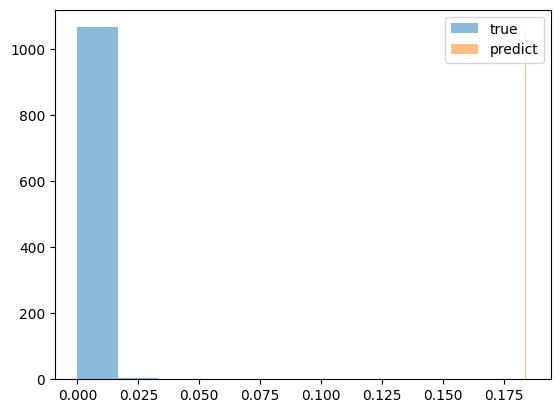

In [59]:
#bins = numpy.linspace(-10, 10, 100)

pyplot.hist(y_test, alpha=0.5, label='true')
pyplot.hist(preds_df, alpha=0.5, label='predict')
pyplot.legend(loc='upper right')
pyplot.show()

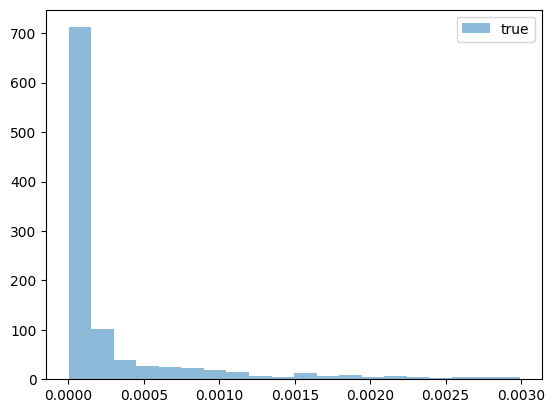

In [88]:
#bins = numpy.linspace(-10, 10, 100)

pyplot.hist(y_test.sort_values(ascending=False)[50:], alpha=0.5, label='true', bins=20)
#pyplot.hist(preds_df, alpha=0.5, label='predict')
pyplot.legend(loc='upper right')
pyplot.show()

In [68]:
y_test.sort_values(ascending=False)[30:]

828     0.004730
382     0.004670
896     0.004540
1030    0.004401
236     0.004378
          ...   
909     0.000001
941     0.000001
676     0.000001
287     0.000001
996     0.000001
Name: q, Length: 1045, dtype: float64

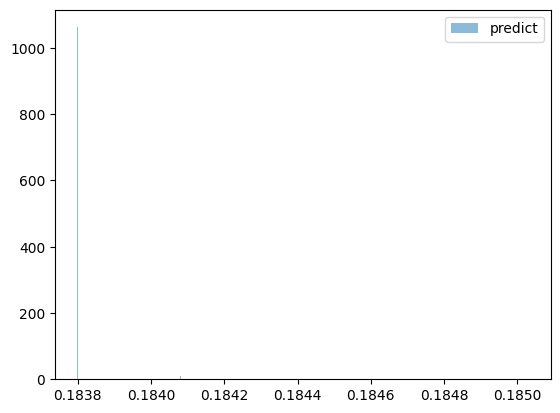

In [74]:
#bins = numpy.linspace(-10, 10, 100)

#pyplot.hist(y_test, alpha=0.5, label='true')
pyplot.hist(preds_df, alpha=0.5, label='predict', bins=1)
pyplot.legend(loc='upper right')
pyplot.show()

In [85]:
preds_df[0].sort_values(ascending=False)[-20:]

352     0.183799
353     0.183799
354     0.183799
355     0.183799
356     0.183799
357     0.183799
358     0.183799
359     0.183799
360     0.183799
361     0.183799
362     0.183799
363     0.183799
364     0.183799
365     0.183799
366     0.183799
367     0.183799
368     0.183799
369     0.183799
370     0.183799
1074    0.183799
Name: 0, dtype: float32

## Trial 4

In [56]:
# Scaling for the featurtes of the dataset
# Special scaling (log) for the q feature
# outliers